<a href="https://colab.research.google.com/github/roshini-joga/3-Layer-Deep-Neural-Network-for-Non-Linear-Regression/blob/master/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorFlow Without High-Level APIs (Manual Implementation)


In [6]:
import tensorflow as tf
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)

# Generate synthetic data
num_samples = 500
x = np.random.uniform(-2, 2, num_samples)
y = np.random.uniform(-2, 2, num_samples)
z = np.random.uniform(-2, 2, num_samples)

# Define the 3-variable non-linear equation
def nonlinear_equation(x, y, z):
    return np.sin(x) + np.cos(y) + np.tanh(z) + 0.1 * x * y * z

# Compute target values
target = nonlinear_equation(x, y, z).reshape(-1, 1)

# Convert NumPy data to TensorFlow tensors
X_tf = tf.convert_to_tensor(np.column_stack((x, y, z)), dtype=tf.float32)
y_tf = tf.convert_to_tensor(target, dtype=tf.float32)

# Define network architecture
input_size, hidden_size1, hidden_size2, output_size = 3, 10, 8, 1

# Initialize weights and biases as TensorFlow variables
W1_tf = tf.Variable(tf.random.normal([input_size, hidden_size1], stddev=0.1))
b1_tf = tf.Variable(tf.zeros([hidden_size1]))

W2_tf = tf.Variable(tf.random.normal([hidden_size1, hidden_size2], stddev=0.1))
b2_tf = tf.Variable(tf.zeros([hidden_size2]))

W3_tf = tf.Variable(tf.random.normal([hidden_size2, output_size], stddev=0.1))
b3_tf = tf.Variable(tf.zeros([output_size]))

# Define ReLU activation function
def relu_tf(x):
    return tf.maximum(0.0, x)

# Define forward propagation using TensorFlow operations
def forward_tf(X):
    Z1 = tf.matmul(X, W1_tf) + b1_tf
    A1 = relu_tf(Z1)

    Z2 = tf.matmul(A1, W2_tf) + b2_tf
    A2 = relu_tf(Z2)

    Z3 = tf.matmul(A2, W3_tf) + b3_tf  # No activation for output layer
    return Z3

# Define Mean Squared Error loss function
def loss_tf(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Training loop using GradientTape for backpropagation
learning_rate_tf = 0.01
epochs_tf = 1000
loss_history_tf = []

for epoch in range(epochs_tf):
    with tf.GradientTape() as tape:
        y_pred_tf = forward_tf(X_tf)
        loss_val = loss_tf(y_tf, y_pred_tf)

    # Compute gradients
    gradients = tape.gradient(loss_val, [W1_tf, b1_tf, W2_tf, b2_tf, W3_tf, b3_tf])

    # Update weights using gradient descent
    for var, grad in zip([W1_tf, b1_tf, W2_tf, b2_tf, W3_tf, b3_tf], gradients):
        var.assign_sub(learning_rate_tf * grad)

    # Store loss
    loss_history_tf.append(loss_val.numpy())

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss_val.numpy():.6f}")

# Final loss after training
print(f"Final Loss after {epochs_tf} epochs: {loss_history_tf[-1]:.6f}")

Epoch 0, Loss: 1.532348
Epoch 100, Loss: 1.294316
Epoch 200, Loss: 1.047171
Epoch 300, Loss: 0.372286
Epoch 400, Loss: 0.267740
Epoch 500, Loss: 0.239289
Epoch 600, Loss: 0.205040
Epoch 700, Loss: 0.161023
Epoch 800, Loss: 0.116061
Epoch 900, Loss: 0.083527
Final Loss after 1000 epochs: 0.067460


#TensorFlow Built-in Layers Implementation

In [7]:
import tensorflow as tf
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)

# Generate synthetic data
num_samples = 500
x = np.random.uniform(-2, 2, num_samples)
y = np.random.uniform(-2, 2, num_samples)
z = np.random.uniform(-2, 2, num_samples)

# Define the 3-variable non-linear equation
def nonlinear_equation(x, y, z):
    return np.sin(x) + np.cos(y) + np.tanh(z) + 0.1 * x * y * z

# Compute target values
target = nonlinear_equation(x, y, z).reshape(-1, 1)

# Convert NumPy data to TensorFlow tensors
X_tf = tf.convert_to_tensor(np.column_stack((x, y, z)), dtype=tf.float32)
y_tf = tf.convert_to_tensor(target, dtype=tf.float32)

# Define the model using built-in layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(3,)),  # Input Layer
    tf.keras.layers.Dense(8, activation='relu'),                     # Hidden Layer
    tf.keras.layers.Dense(1)                                         # Output Layer (no activation)
])

# Define loss function and optimizer
loss_function = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Training loop
epochs_tf = 1000
loss_history_tf = []

for epoch in range(epochs_tf):
    with tf.GradientTape() as tape:
        y_pred_tf = model(X_tf, training=True)
        loss_val = loss_function(y_tf, y_pred_tf)

    # Compute gradients
    gradients = tape.gradient(loss_val, model.trainable_variables)

    # Update weights using optimizer
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Store loss
    loss_history_tf.append(loss_val.numpy())

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss_val.numpy():.6f}")

# Final loss after training
print(f"Final Loss after {epochs_tf} epochs: {loss_history_tf[-1]:.6f}")


Epoch 0, Loss: 1.500601


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 100, Loss: 0.022569
Epoch 200, Loss: 0.011377
Epoch 300, Loss: 0.008250
Epoch 400, Loss: 0.006145
Epoch 500, Loss: 0.004750
Epoch 600, Loss: 0.003932
Epoch 700, Loss: 0.003391
Epoch 800, Loss: 0.003078
Epoch 900, Loss: 0.002933
Final Loss after 1000 epochs: 0.002814


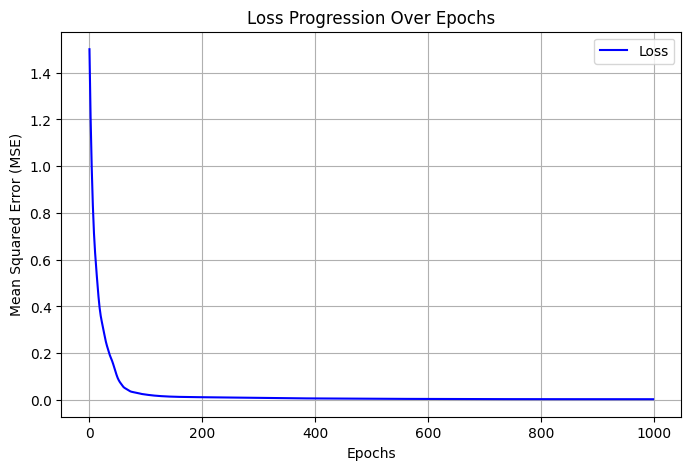

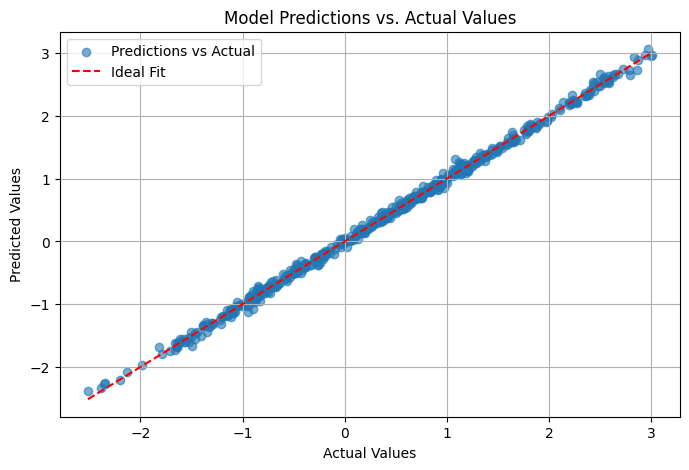

In [8]:
# Plot loss progression
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(loss_history_tf, label="Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Progression Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# Generate final predictions
y_pred_final = model(X_tf, training=False)

# Scatter plot comparing predictions vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_tf, y_pred_final, alpha=0.6, label="Predictions vs Actual")
plt.plot([min(y_tf), max(y_tf)], [min(y_tf), max(y_tf)], color="red", linestyle="dashed", label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions vs. Actual Values")
plt.legend()
plt.grid(True)
plt.show()

#TensorFlow Functional API Implementation


Final Loss after 1000 epochs: 0.001923


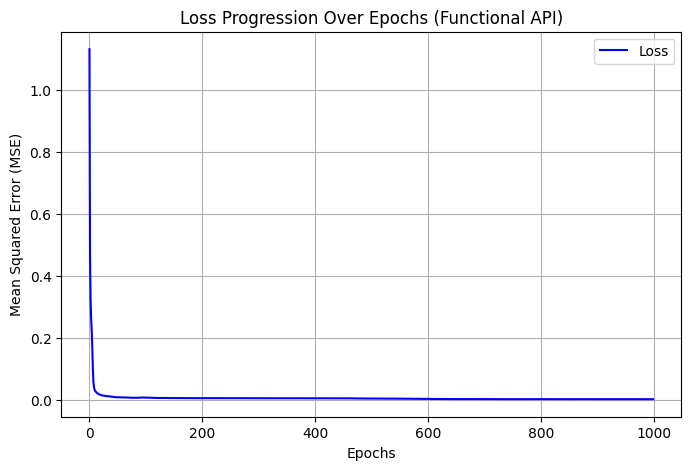

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


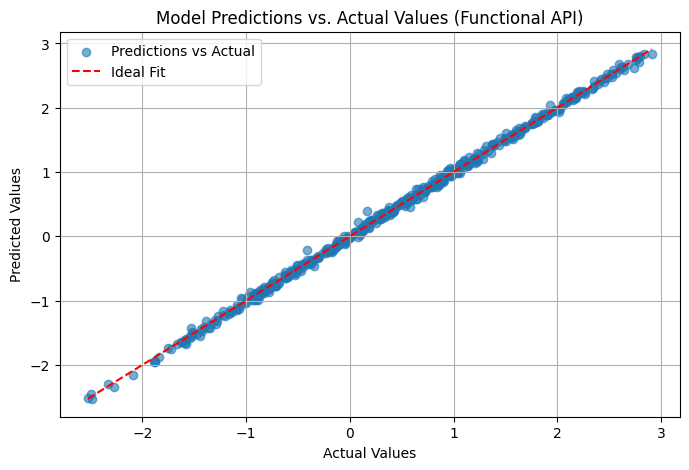

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)

# Generate synthetic data
num_samples = 500
x = np.random.uniform(-2, 2, num_samples)
y = np.random.uniform(-2, 2, num_samples)
z = np.random.uniform(-2, 2, num_samples)

# Define the 3-variable non-linear equation
def nonlinear_equation(x, y, z):
    return np.sin(x) + np.cos(y) + np.tanh(z) + 0.1 * x * y * z

# Compute target values
target = nonlinear_equation(x, y, z).reshape(-1, 1)

# Convert NumPy data to TensorFlow tensors
X_tf = tf.convert_to_tensor(np.column_stack((x, y, z)), dtype=tf.float32)
y_tf = tf.convert_to_tensor(target, dtype=tf.float32)

# Define model using Functional API
inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(10, activation='relu')(inputs)
x = tf.keras.layers.Dense(8, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

# Create model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse')

# Train model
history = model.fit(X_tf, y_tf, epochs=1000, verbose=0)

# Print final loss
final_loss = history.history['loss'][-1]
print(f"Final Loss after 1000 epochs: {final_loss:.6f}")

# Plot loss progression
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label="Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Progression Over Epochs (Functional API)")
plt.legend()
plt.grid(True)
plt.show()

# Generate final predictions
y_pred_final = model.predict(X_tf)

# Scatter plot comparing predictions vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_tf, y_pred_final, alpha=0.6, label="Predictions vs Actual")
plt.plot([min(y_tf), max(y_tf)], [min(y_tf), max(y_tf)], color="red", linestyle="dashed", label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions vs. Actual Values (Functional API)")
plt.legend()
plt.grid(True)
plt.show()

#TensorFlow High-Level API (Sequential) Implementation


Final Loss after 1000 epochs: 0.003010


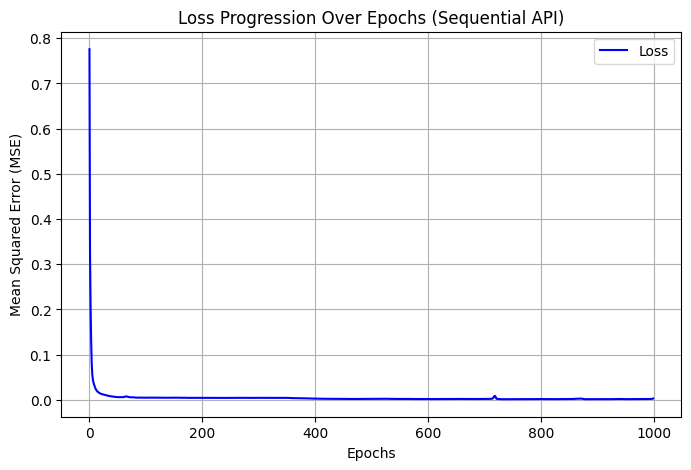

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


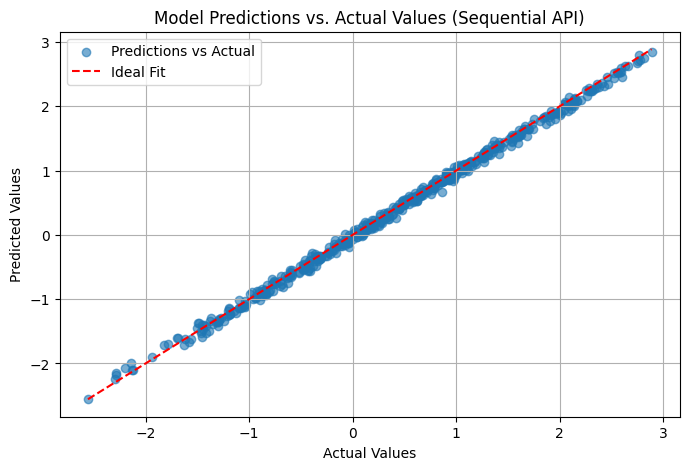

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)

# Generate synthetic data
num_samples = 500
x = np.random.uniform(-2, 2, num_samples)
y = np.random.uniform(-2, 2, num_samples)
z = np.random.uniform(-2, 2, num_samples)

# Define the 3-variable non-linear equation
def nonlinear_equation(x, y, z):
    return np.sin(x) + np.cos(y) + np.tanh(z) + 0.1 * x * y * z

# Compute target values
target = nonlinear_equation(x, y, z).reshape(-1, 1)

# Convert NumPy data to TensorFlow tensors
X_tf = tf.convert_to_tensor(np.column_stack((x, y, z)), dtype=tf.float32)
y_tf = tf.convert_to_tensor(target, dtype=tf.float32)

# Define model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(3,)),  # Input Layer
    tf.keras.layers.Dense(8, activation='relu'),                     # Hidden Layer
    tf.keras.layers.Dense(1)                                         # Output Layer (no activation)
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse')

# Train model
history = model.fit(X_tf, y_tf, epochs=1000, verbose=0)

# Print final loss
final_loss = history.history['loss'][-1]
print(f"Final Loss after 1000 epochs: {final_loss:.6f}")

# Plot loss progression
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label="Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Progression Over Epochs (Sequential API)")
plt.legend()
plt.grid(True)
plt.show()

# Generate final predictions
y_pred_final = model.predict(X_tf)

# Scatter plot comparing predictions vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_tf, y_pred_final, alpha=0.6, label="Predictions vs Actual")
plt.plot([min(y_tf), max(y_tf)], [min(y_tf), max(y_tf)], color="red", linestyle="dashed", label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions vs. Actual Values (Sequential API)")
plt.legend()
plt.grid(True)
plt.show()

#TensorFlow Without High-Level APIs (Using tf.einsum)



In [10]:
import tensorflow as tf
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)

# Generate synthetic data
num_samples = 500
x = np.random.uniform(-2, 2, num_samples)
y = np.random.uniform(-2, 2, num_samples)
z = np.random.uniform(-2, 2, num_samples)

# Define the 3-variable non-linear equation
def nonlinear_equation(x, y, z):
    return np.sin(x) + np.cos(y) + np.tanh(z) + 0.1 * x * y * z

# Compute target values
target = nonlinear_equation(x, y, z).reshape(-1, 1)

# Convert NumPy data to TensorFlow tensors
X_tf = tf.convert_to_tensor(np.column_stack((x, y, z)), dtype=tf.float32)
y_tf = tf.convert_to_tensor(target, dtype=tf.float32)

# Define network architecture
input_size, hidden_size1, hidden_size2, output_size = 3, 10, 8, 1

# Initialize weights and biases as TensorFlow variables
W1_tf = tf.Variable(tf.random.normal([input_size, hidden_size1], stddev=0.1))
b1_tf = tf.Variable(tf.zeros([hidden_size1]))

W2_tf = tf.Variable(tf.random.normal([hidden_size1, hidden_size2], stddev=0.1))
b2_tf = tf.Variable(tf.zeros([hidden_size2]))

W3_tf = tf.Variable(tf.random.normal([hidden_size2, output_size], stddev=0.1))
b3_tf = tf.Variable(tf.zeros([output_size]))

# Define ReLU activation function
def relu_tf(x):
    return tf.maximum(0.0, x)

# Define forward propagation using TensorFlow einsum
def forward_tf(X):
    Z1 = tf.einsum("ij,jk->ik", X, W1_tf) + b1_tf
    A1 = relu_tf(Z1)

    Z2 = tf.einsum("ij,jk->ik", A1, W2_tf) + b2_tf
    A2 = relu_tf(Z2)

    Z3 = tf.einsum("ij,jk->ik", A2, W3_tf) + b3_tf  # No activation for output layer
    return Z3

# Define Mean Squared Error loss function
def loss_tf(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Training loop using GradientTape for backpropagation
learning_rate_tf = 0.01
epochs_tf = 1000
loss_history_tf = []

for epoch in range(epochs_tf):
    with tf.GradientTape() as tape:
        y_pred_tf = forward_tf(X_tf)
        loss_val = loss_tf(y_tf, y_pred_tf)

    # Compute gradients
    gradients = tape.gradient(loss_val, [W1_tf, b1_tf, W2_tf, b2_tf, W3_tf, b3_tf])

    # Update weights using optimizer
    for var, grad in zip([W1_tf, b1_tf, W2_tf, b2_tf, W3_tf, b3_tf], gradients):
        var.assign_sub(learning_rate_tf * grad)

    # Store loss
    loss_history_tf.append(loss_val.numpy())

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss_val.numpy():.6f}")

# Final loss after training
print(f"Final Loss after {epochs_tf} epochs: {loss_history_tf[-1]:.6f}")


Epoch 0, Loss: 1.569265
Epoch 100, Loss: 1.321249
Epoch 200, Loss: 0.954521
Epoch 300, Loss: 0.288144
Epoch 400, Loss: 0.244043
Epoch 500, Loss: 0.220487
Epoch 600, Loss: 0.191452
Epoch 700, Loss: 0.158197
Epoch 800, Loss: 0.121119
Epoch 900, Loss: 0.089277
Final Loss after 1000 epochs: 0.069654


#2. TensorFlow Built-in Layers (GradientTape) Using tf.einsum


In [11]:
# Define a custom layer using tf.einsum
class EinsumDense(tf.keras.layers.Layer):
    def __init__(self, output_dim, activation=None):
        super(EinsumDense, self).__init__()
        self.output_dim = output_dim
        self.activation = activation

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], self.output_dim),
                                 initializer="random_normal",
                                 trainable=True)
        self.b = self.add_weight(shape=(self.output_dim,),
                                 initializer="zeros",
                                 trainable=True)

    def call(self, inputs):
        output = tf.einsum("ij,jk->ik", inputs, self.W) + self.b
        if self.activation:
            return self.activation(output)
        return output

# Define model using custom EinsumDense layers
model = tf.keras.Sequential([
    EinsumDense(10, activation=tf.nn.relu),
    EinsumDense(8, activation=tf.nn.relu),
    EinsumDense(1)
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse')

# Train model
history = model.fit(X_tf, y_tf, epochs=1000, verbose=0)

# Print final loss
final_loss = history.history['loss'][-1]
print(f"Final Loss after 1000 epochs: {final_loss:.6f}")


Final Loss after 1000 epochs: 0.003011


#3. TensorFlow Functional API with tf.einsum


In [12]:
# Define model using Functional API and custom EinsumDense layers
inputs = tf.keras.Input(shape=(3,))
x = EinsumDense(10, activation=tf.nn.relu)(inputs)
x = EinsumDense(8, activation=tf.nn.relu)(x)
outputs = EinsumDense(1)(x)

# Create model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse')

# Train model
history = model.fit(X_tf, y_tf, epochs=1000, verbose=0)

# Print final loss
final_loss = history.history['loss'][-1]
print(f"Final Loss after 1000 epochs: {final_loss:.6f}")


Final Loss after 1000 epochs: 0.017863


#4. TensorFlow High-Level API (Sequential) with tf.einsum


In [13]:
# Define model using Sequential API and custom EinsumDense layers
model = tf.keras.Sequential([
    EinsumDense(10, activation=tf.nn.relu),
    EinsumDense(8, activation=tf.nn.relu),
    EinsumDense(1)
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse')

# Train model
history = model.fit(X_tf, y_tf, epochs=1000, verbose=0)

# Print final loss
final_loss = history.history['loss'][-1]
print(f"Final Loss after 1000 epochs: {final_loss:.6f}")


Final Loss after 1000 epochs: 0.003566


#Data Generation & Visualization

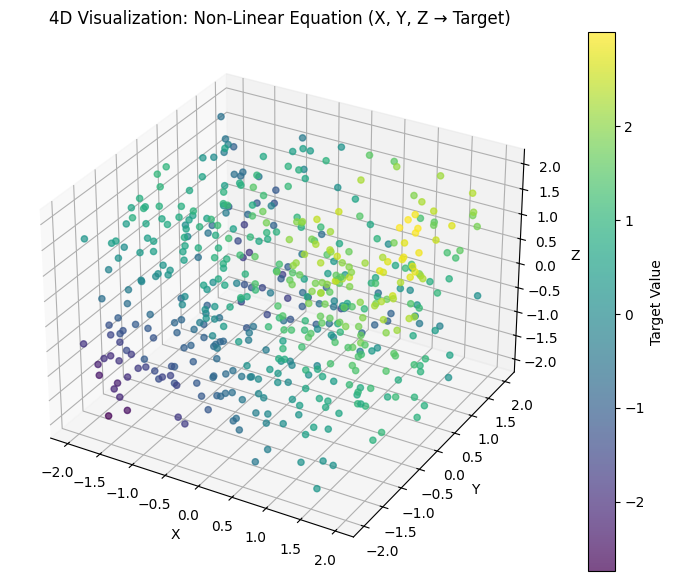

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)

# Define a 3-variable-based non-linear equation
def nonlinear_equation(x, y, z):
    return np.sin(x) + np.cos(y) + np.tanh(z) + 0.1 * x * y * z

# Generate synthetic data
num_samples = 500
x = np.random.uniform(-2, 2, num_samples)
y = np.random.uniform(-2, 2, num_samples)
z = np.random.uniform(-2, 2, num_samples)

# Compute the target value
target = nonlinear_equation(x, y, z)

# Create a 4D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color representing the 4th dimension (target value)
sc = ax.scatter(x, y, z, c=target, cmap='viridis', marker='o', alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(sc, label='Target Value')

plt.title("4D Visualization: Non-Linear Equation (X, Y, Z → Target)")
plt.show()